This notebook is for generating figures for Abstract 2 (Fibre strain homogeneity versus longitudinal strain) for HRS

Using pyvista

We will only look at:

* Endocardial fibres
* Using the atlas when looking regionally
* **Only using DT-MRI Fibres**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from hrs_23_figures import *
import pyvista as pv
from scipy import stats
from sklearn.metrics import mean_squared_error

all_cases = af_cases + nonaf_cases

len(all_cases)

29

# Global

In [66]:
## Using percentiles
## 
## First fig:
## How does global spread of strains compare between areaitudinal
## fiber atlas and rule-based fibers? 

frame=4
upper_percent=99
# fibre_arch="endo_avg"

## Following arrays contain global strain standard deviation,
## mean and median for all cases
## Stored for all architectures and rule-based fibers

fib_std=np.zeros((len(all_cases),9))
fib_mean=np.zeros((len(all_cases),9))
fib_med=np.zeros((len(all_cases),9))

area_std=np.zeros((len(all_cases),))
area_mean=np.zeros((len(all_cases),))
area_med=np.zeros((len(all_cases),))

area_sqrt_std=np.zeros((len(all_cases),))
area_sqrt_mean=np.zeros((len(all_cases),))
area_sqrt_med=np.zeros((len(all_cases),))

squeez_std=np.zeros((len(all_cases),))
squeez_mean=np.zeros((len(all_cases),))
squeez_med=np.zeros((len(all_cases),))

squeez_minus_std=np.zeros((len(all_cases),))
squeez_minus_mean=np.zeros((len(all_cases),))
squeez_minus_med=np.zeros((len(all_cases),))


fib_arch_list = ["endo_1", "endo_2", "endo_3", "endo_4",
                 "endo_5", "endo_6", "endo_7", "endo_avg", 
                 "endo_l"]

for i in range(0, len(all_cases)):
    
    case=all_cases[i]
#     print(all_cases[i])
    
    for j in range(0, len(fib_arch_list)):
        
#         print(fib_arch_list[j])
        
        fib_data = retrieve_fibres_all_data(case, fib_arch_list[j], 
                                            frame)['f1']
        data_bounds = np.percentile(fib_data, [0, upper_percent])
        condition = fib_data[:] > data_bounds[1]
        fib_data[condition]=np.nan
        
        fib_std[i, j] = np.nanstd(fib_data)
        fib_mean[i, j] = np.nanmean(fib_data)
        fib_med[i, j] = np.nanmedian(fib_data)

    area_data = retrieve_area_strain_all_data(case, "area", frame)['Area']
    squeez_data = retrieve_area_strain_all_data(case, "squeez", frame)['Area']
    squeez_minus_data = retrieve_area_strain_all_data(case, "squeez-minus", frame)['Area']
    
    area_data_bounds = np.percentile(area_data, [1, 100])
    condition_l = area_data[:] < area_data_bounds[0]
    area_data[condition_l]=np.nan

    area_std[i] = np.nanstd(area_data)
    area_mean[i] = np.nanmean(area_data)
    area_med[i] = np.nanmedian(area_data)
    
    area_sqrt_std[i] = np.nanstd(area_data.apply(np.sqrt))
    area_sqrt_mean[i] = np.nanmean(area_data.apply(np.sqrt))
    area_sqrt_med[i] = np.nanmedian(area_data.apply(np.sqrt))
    
    squeez_std[i] = np.nanstd(squeez_data)
    squeez_mean[i] = np.nanmean(squeez_data)
    squeez_med[i] = np.nanmedian(squeez_data)
    
    squeez_minus_std[i] = np.nanstd(squeez_minus_data)
    squeez_minus_mean[i] = np.nanmean(squeez_minus_data)
    squeez_minus_med[i] = np.nanmedian(squeez_minus_data)
    
#     print(case, "\t", std, "\t", std_l)

In [69]:
# np.sum(condition_l)
np.sum(area_data.isna())

1864

## Abstract Figures

Using only the endo_avg DT-MRI architecture

In [70]:
## Regionally 

frame=4
upper_percent=99
# fib_arch="endo_avg"

## N_cases, N_regions

fib_reg_std=np.zeros((len(all_cases),5,2))
fib_reg_mean=np.zeros((len(all_cases),5,2))
fib_reg_med=np.zeros((len(all_cases),5,2))

area_reg_std=np.zeros((len(all_cases),5))
area_reg_mean=np.zeros((len(all_cases),5))
area_reg_med=np.zeros((len(all_cases),5))

area_sqrt_reg_std=np.zeros((len(all_cases),5))
area_sqrt_reg_mean=np.zeros((len(all_cases),5))
area_sqrt_reg_med=np.zeros((len(all_cases),5))

squeez_reg_std=np.zeros((len(all_cases),5))
squeez_reg_mean=np.zeros((len(all_cases),5))
squeez_reg_med=np.zeros((len(all_cases),5))

squeez_minus_reg_std=np.zeros((len(all_cases),5))
squeez_minus_reg_mean=np.zeros((len(all_cases),5))
squeez_minus_reg_med=np.zeros((len(all_cases),5))


p_val_std=np.zeros((5,))

regions = ["roof", "sept", "lat", "ant", "post"]
fibre_arch_list = ["endo_avg", "endo_l"]

for i in range(0, len(all_cases)):
    case=all_cases[i]
#     print(case)
    
    for region_j in range(0,len(regions)):
        region = regions[region_j]
#         print(region)

        for fib_k in range(0,len(fibre_arch_list)):
            fib_arch = fibre_arch_list[fib_k]
#             print(fib_arch)
    
            ## All regional cell data
            ## Fibres
            data = extract_region(case, fib_arch, frame,
                                  region_j+1)['f1']
            data_bounds = np.percentile(data, [0, upper_percent])
            condition = data[:] > data_bounds[1]
            data[condition]=np.nan
            
            fib_reg_std[i, region_j, fib_k]=np.nanstd(data)
            fib_reg_mean[i, region_j, fib_k]=np.nanmean(data)
            fib_reg_med[i, region_j, fib_k]=np.nanmedian(data)

        ## All regional cell data
        ## areaitudinal
        area_data = extract_region_area(case, 'area', frame, region_j+1)['Area']
        squeez_data = extract_region_area(case, 'squeez', frame, region_j+1)['Area']
        squeez_minus_data = extract_region_area(case, 'squeez-minus', frame, region_j+1)['Area']
        
        area_data_bounds = np.percentile(area_data, [1, 100])
        condition_l = area_data[:] < area_data_bounds[0]
        area_data[condition_l]=np.nan
        
        area_reg_std[i, region_j]=np.nanstd(area_data)
        area_reg_mean[i, region_j]=np.nanmean(area_data)
        area_reg_med[i, region_j]=np.nanmedian(area_data)
        
        area_sqrt_reg_std[i, region_j]=np.nanstd(area_data.apply(np.sqrt))
        area_sqrt_reg_mean[i, region_j]=np.nanmean(area_data.apply(np.sqrt))
        area_sqrt_reg_med[i, region_j]=np.nanmedian(area_data.apply(np.sqrt))
        
        squeez_reg_std[i, region_j]=np.nanstd(squeez_data)
        squeez_reg_mean[i, region_j]=np.nanmean(squeez_data)
        squeez_reg_med[i, region_j]=np.nanmedian(squeez_data)
        
        squeez_minus_reg_std[i, region_j]=np.nanstd(squeez_minus_data)
        squeez_minus_reg_mean[i, region_j]=np.nanmean(squeez_minus_data)
        squeez_minus_reg_med[i, region_j]=np.nanmedian(squeez_minus_data)

#         print(case, "\t", std, "\t", std_l)

# for i in range(0, len(regions)):
#     p_val_std[i] = stats.ttest_ind(fib_std[:, i], area_std[:, i])[-1]

#     print(p_val_std[i])
    
## More pronounced differences between spread of strain values
## area seems to have more homogeneous strains except for the lateral wall

In [74]:
np.sum(condition_l)
np.sum(area_data.isna())
area_data_bounds[0]

-0.2912854929911139

In [9]:
regions

['roof', 'sept', 'lat', 'ant', 'post']

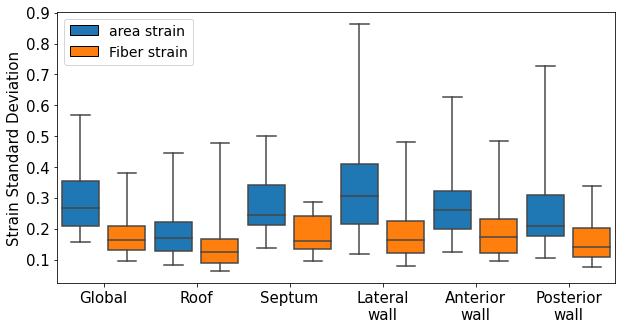

In [75]:
## Plotting
## Std deviation
## Reigonally 

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [area_std[:], fib_std[:, 7],
                area_reg_std[:, 0], fib_reg_std[:, 0, 0],
                area_reg_std[:, 1], fib_reg_std[:, 1, 0],
                area_reg_std[:, 2], fib_reg_std[:, 2, 0],
                area_reg_std[:, 3], fib_reg_std[:, 3, 0],
                area_reg_std[:, 4], fib_reg_std[:, 4, 0]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')

region_lab = ['Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall',
              'Posterior\nwall']
x_labs = []
x_labs.append("Global")
x_labs += region_lab

plt.yticks(fontsize=15)
plt.ylabel("Strain Standard Deviation", fontsize=15)
plt.xticks(np.arange(0.5, 11.5, 2), x_labs, fontsize=15)
# plt.ylim(0,0.75)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='area strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Fiber strain')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/boxplots_1.png",
#            dpi=200, bbox_inches="tight")

In [13]:
## p values between two fib arch;s for all regions

pval_reg_fibs = np.zeros((5,))

print("Between fibres:")

for region_i in range(0, pval_reg_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_std[:, region_i, 0], fib_reg_std[:, region_i, 1])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_area_dtmri_fibs = np.zeros((5,))

print("\nBetween area and DTMRI fibres:")

for region_i in range(0, pval_reg_area_dtmri_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_std[:, region_i, 0], 0.5*area_reg_std[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")


Between fibres:
Region: roof pval: 0.637
Region: sept pval: 0.694
Region: lat pval: 0.926
Region: ant pval: 0.678
Region: post pval: 0.591

Between area and DTMRI fibres:
Region: roof pval: 0.013
Region: sept pval: 0.001
Region: lat pval: 0.312
Region: ant pval: 0.013
Region: post pval: 0.134


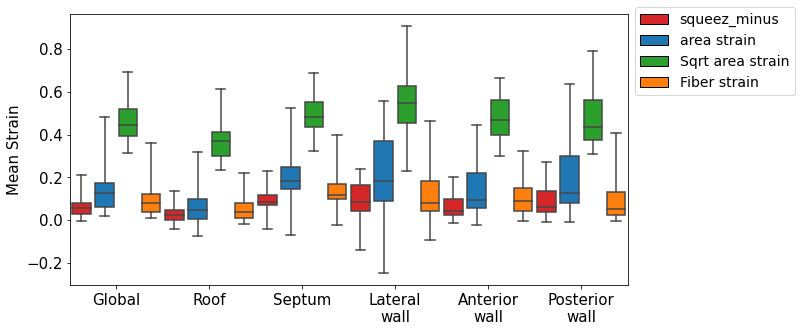

In [45]:
## Plotting
## Mean
## Regionally

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [squeez_minus_mean[:], area_mean[:], area_sqrt_mean[:], fib_mean[:, -2],
                squeez_minus_reg_mean[:, 0], area_reg_mean[:, 0], area_sqrt_reg_mean[:, 0], fib_reg_mean[:, 0, 0],
                squeez_minus_reg_mean[:, 1], area_reg_mean[:, 1], area_sqrt_reg_mean[:, 1], fib_reg_mean[:, 1, 0],
                squeez_minus_reg_mean[:, 2], area_reg_mean[:, 2], area_sqrt_reg_mean[:, 2], fib_reg_mean[:, 2, 0],
                squeez_minus_reg_mean[:, 3], area_reg_mean[:, 3], area_sqrt_reg_mean[:, 3], fib_reg_mean[:, 3, 0],
                squeez_minus_reg_mean[:, 4], area_reg_mean[:, 4], area_sqrt_reg_mean[:, 4], fib_reg_mean[:, 4, 0]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 24, 4):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:red')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+2]
    mybox.set_facecolor('tab:green')
    
    mybox = ax1.patches[i+3]
    mybox.set_facecolor('tab:orange')

x_labs = []
x_labs.append("Global")
x_labs += region_lab

plt.ylabel("Mean Strain", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(1.5, 22.5, 4), x_labs, fontsize=15)
# plt.ylim(-0.13, 0.75)

legend_elements = [Patch(facecolor='tab:red', edgecolor='black',
                         label='squeez_minus'),
                   Patch(facecolor='tab:blue', edgecolor='black',
                         label='area strain'),
                   Patch(facecolor='tab:green', edgecolor='black',
                         label='Sqrt area strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Fiber strain')]
ax1.legend(handles=legend_elements, fontsize=14, bbox_to_anchor=(1.0, 1.05))

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/mean_boxplots_1.png",
#            dpi=200, bbox_inches="tight")

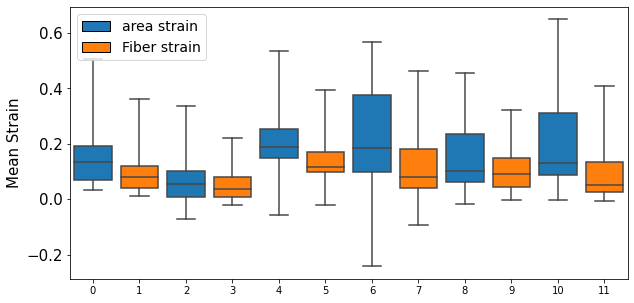

In [41]:
## Plotting
## Mean
## Regionally

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [area_mean[:], fib_mean[:, -2],
                area_reg_mean[:, 0], fib_reg_mean[:, 0, 0],
                area_reg_mean[:, 1], fib_reg_mean[:, 1, 0],
                area_reg_mean[:, 2], fib_reg_mean[:, 2, 0],
                area_reg_mean[:, 3], fib_reg_mean[:, 3, 0],
                area_reg_mean[:, 4], fib_reg_mean[:, 4, 0]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')

x_labs = []
x_labs.append("Global")
x_labs += region_lab

plt.ylabel("Mean Strain", fontsize=15)
plt.yticks(fontsize=15)
# plt.xticks(np.arange(0.5, 11.5, 2), x_labs, fontsize=15)
# plt.ylim(-0.13, 0.75)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='area strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Fiber strain')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/mean_boxplots_1.png",
#            dpi=200, bbox_inches="tight")

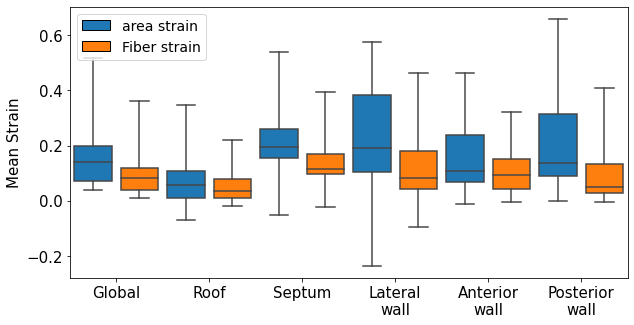

In [77]:
## Plotting
## Mean
## Regionally

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [area_mean[:], fib_mean[:, -2],
                area_reg_mean[:, 0], fib_reg_mean[:, 0, 0],
                area_reg_mean[:, 1], fib_reg_mean[:, 1, 0],
                area_reg_mean[:, 2], fib_reg_mean[:, 2, 0],
                area_reg_mean[:, 3], fib_reg_mean[:, 3, 0],
                area_reg_mean[:, 4], fib_reg_mean[:, 4, 0]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')

x_labs = []
x_labs.append("Global")
x_labs += region_lab

plt.ylabel("Mean Strain", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(0.5, 11.5, 2), x_labs, fontsize=15)
# plt.ylim(-0.13, 0.75)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='area strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Fiber strain')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/mean_boxplots_1.png",
#            dpi=200, bbox_inches="tight")

In [16]:
## p values

pval_reg_fibs = np.zeros((5,))

print("Between fibres:")

for region_i in range(0, pval_reg_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_mean[:, region_i, 0], fib_reg_mean[:, region_i, 1])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_area_dtmri_fibs = np.zeros((5,))

print("\nBetween area and DTMRI fibres:")

for region_i in range(0, pval_reg_area_dtmri_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_mean[:, region_i, 0], area_reg_mean[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")


Between fibres:
Region: roof pval: 0.367
Region: sept pval: 0.788
Region: lat pval: 0.93
Region: ant pval: 0.418
Region: post pval: 0.543

Between area and DTMRI fibres:
Region: roof pval: 0.657
Region: sept pval: 0.009
Region: lat pval: 0.017
Region: ant pval: 0.128
Region: post pval: 0.004


# Scatter Plots

Enable one to gain a case-by-case comparison of quantities

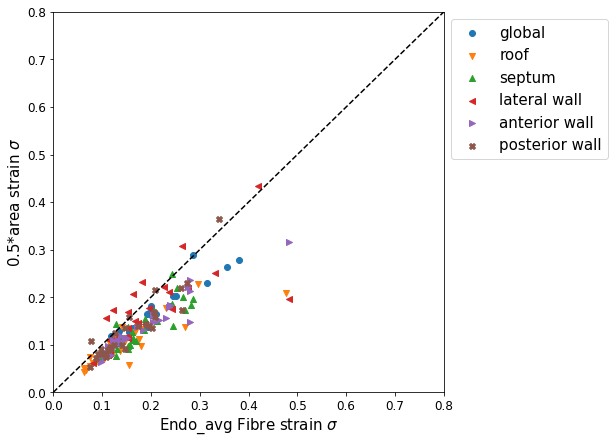

In [21]:
## Plotting Std Dev

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_std[:, -2], 0.5*area_std[:], label="global", marker="o")
ax1.scatter(fib_reg_std[:, 0, 0], 0.5*area_reg_std[:, 0], label="roof", marker="v")
ax1.scatter(fib_reg_std[:, 1, 0], 0.5*area_reg_std[:, 1], label="septum", marker="^")
ax1.scatter(fib_reg_std[:, 2, 0], 0.5*area_reg_std[:, 2], label="lateral wall", marker="<")
ax1.scatter(fib_reg_std[:, 3, 0], 0.5*area_reg_std[:, 3], label="anterior wall", marker=">")
ax1.scatter(fib_reg_std[:, 4, 0], 0.5*area_reg_std[:, 4], label="posterior wall", marker="X")

ax1.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain $\sigma$", fontsize=15)
ax1.set_ylabel("0.5*area strain $\sigma$", fontsize=15)
plt.ylim(0.0, 0.8)
plt.xlim(0.0, 0.8)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

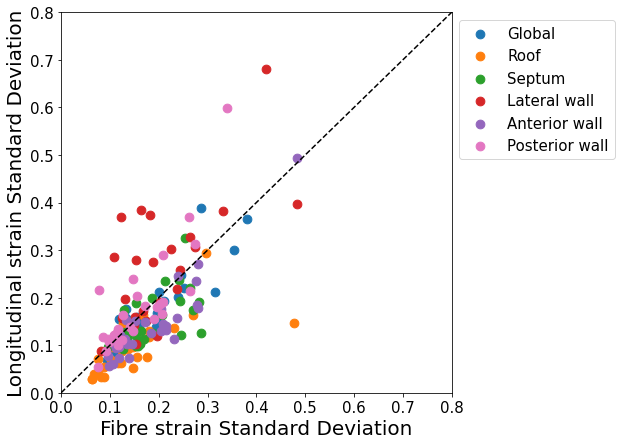

In [51]:
## Plotting Std Dev

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_std[:, -2], long_std[:], label="Global",s=76, alpha=1.0, c="tab:blue")
ax1.scatter(fib_reg_std[:, 0, 0], long_reg_std[:, 0], label="Roof",s=76, alpha=1.0, c="tab:orange")
ax1.scatter(fib_reg_std[:, 1, 0], long_reg_std[:, 1], label="Septum",s=76, alpha=1.0, c="tab:green")
ax1.scatter(fib_reg_std[:, 2, 0], long_reg_std[:, 2], label="Lateral wall",s=76, alpha=1.0, c="tab:red")
ax1.scatter(fib_reg_std[:, 3, 0], long_reg_std[:, 3], label="Anterior wall",s=76, alpha=1.0, c="tab:purple")
ax1.scatter(fib_reg_std[:, 4, 0], long_reg_std[:, 4], label="Posterior wall",s=76, alpha=1.0, c="tab:pink")

ax1.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

ax1.set_xlabel("Fibre strain Standard Deviation", fontsize=20)
ax1.set_ylabel("Longitudinal strain Standard Deviation", fontsize=20)
plt.ylim(0.0, 0.8)
plt.xlim(0.0, 0.8)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

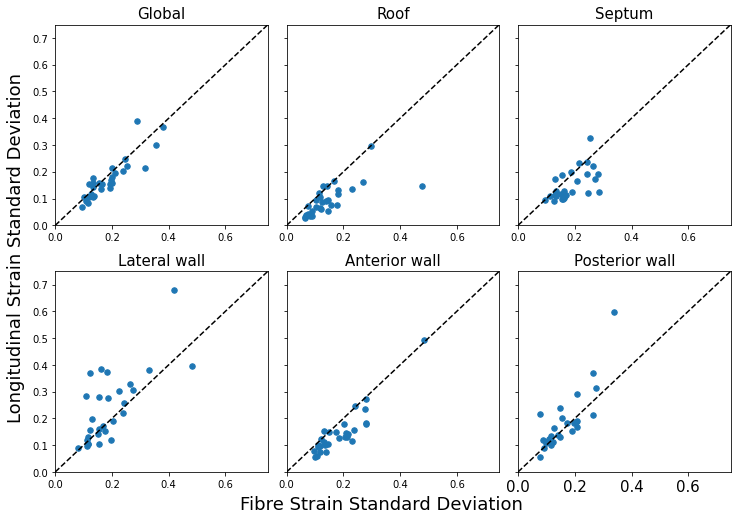

In [101]:
## Plotting Std Dev

fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_std[:, -2], long_std[:], label="Global",s=30, alpha=1.0)
ax2.scatter(fib_reg_std[:, 0, 0], long_reg_std[:, 0], label="Roof",s=30, alpha=1.0)
ax3.scatter(fib_reg_std[:, 1, 0], long_reg_std[:, 1], label="Septum",s=30, alpha=1.0)
ax4.scatter(fib_reg_std[:, 2, 0], long_reg_std[:, 2], label="Lateral wall",s=30, alpha=1.0)
ax5.scatter(fib_reg_std[:, 3, 0], long_reg_std[:, 3], label="Anterior wall",s=30, alpha=1.0)
ax6.scatter(fib_reg_std[:, 4, 0], long_reg_std[:, 4], label="Posterior wall",s=30, alpha=1.0)

ax1.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax2.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax3.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax4.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax5.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax6.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

# ax1.set_xlabel("Fibre strain Standard Deviation", fontsize=20)
ax1.set_ylim(0.0, 0.75)
ax1.set_xlim(0.0, 0.75)
ax2.set_ylim(0.0, 0.75)
ax2.set_xlim(0.0, 0.75)
ax3.set_ylim(0.0, 0.75)
ax3.set_xlim(0.0, 0.75)
ax4.set_ylim(0.0, 0.75)
ax4.set_xlim(0.0, 0.75)
ax5.set_ylim(0.0, 0.75)
ax5.set_xlim(0.0, 0.75)
ax6.set_ylim(0.0, 0.75)
ax6.set_xlim(0.0, 0.75)

ax1.set_title("Global", fontsize=15)
ax2.set_title("Roof", fontsize=15)
ax3.set_title("Septum", fontsize=15)
ax4.set_title("Lateral wall", fontsize=15)
ax5.set_title("Anterior wall", fontsize=15)
ax6.set_title("Posterior wall", fontsize=15)
plt.tight_layout()

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
fig.text(-0.02, 0.5, "Longitudinal Strain Standard Deviation",
         va='center', rotation='vertical', fontsize=18)
fig.text(0.5, -0.02, "Fibre Strain Standard Deviation", 
         ha='center', fontsize=18)

# ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))
# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/stddev_scatter.png",
#            dpi=200, bbox_inches="tight")

In [191]:
## Calculate pearson r coeff between long and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_std[:, -2], long_std[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_std[:, -2], long_std[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, 0], 
                                 long_reg_std[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, 0], 
                                 long_reg_std[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.885	rmse:	0.038
Region: roof 	r:	0.675 	rmse:	0.08
Region: sept 	r:	0.616 	rmse:	0.059
Region: lat 	r:	0.717 	rmse:	0.103
Region: ant 	r:	0.909 	rmse:	0.054
Region: post 	r:	0.83 	rmse:	0.066


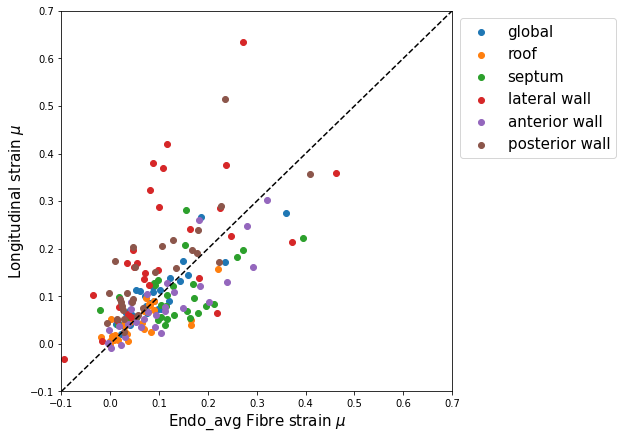

In [97]:
## Plot Mean

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

ax1.scatter(fib_mean[:, -2], long_mean[:], label="global")
ax1.scatter(fib_reg_mean[:, 0, 0], long_reg_mean[:, 0], label="roof")
ax1.scatter(fib_reg_mean[:, 1, 0], long_reg_mean[:, 1], label="septum")
ax1.scatter(fib_reg_mean[:, 2, 0], long_reg_mean[:, 2], label="lateral wall")
ax1.scatter(fib_reg_mean[:, 3, 0], long_reg_mean[:, 3], label="anterior wall")
ax1.scatter(fib_reg_mean[:, 4, 0], long_reg_mean[:, 4], label="posterior wall")

ax1.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain $\mu$", fontsize=15)
ax1.set_ylabel("Longitudinal strain $\mu$", fontsize=15)
plt.ylim(-0.1, 0.7)
plt.xlim(-0.1, 0.7)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

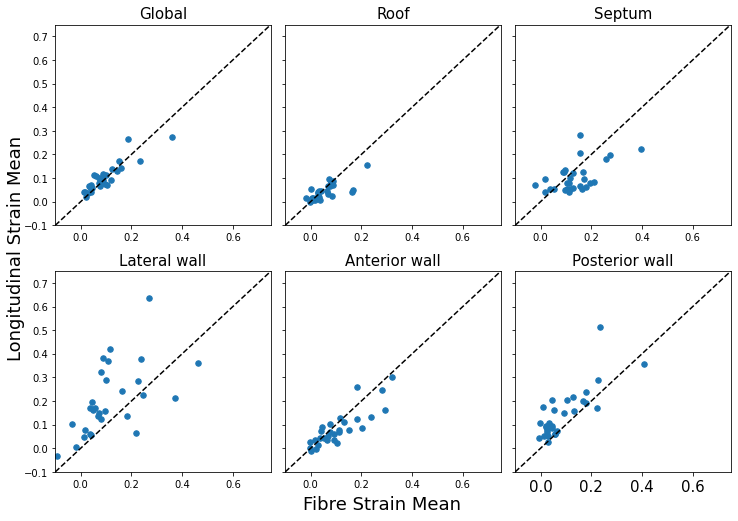

In [102]:
## Plotting Mean

fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_mean[:, -2], long_mean[:], label="Global",s=30, alpha=1.0)
ax2.scatter(fib_reg_mean[:, 0, 0], long_reg_mean[:, 0], label="Roof",s=30, alpha=1.0)
ax3.scatter(fib_reg_mean[:, 1, 0], long_reg_mean[:, 1], label="Septum",s=30, alpha=1.0)
ax4.scatter(fib_reg_mean[:, 2, 0], long_reg_mean[:, 2], label="Lateral wall",s=30, alpha=1.0)
ax5.scatter(fib_reg_mean[:, 3, 0], long_reg_mean[:, 3], label="Anterior wall",s=30, alpha=1.0)
ax6.scatter(fib_reg_mean[:, 4, 0], long_reg_mean[:, 4], label="Posterior wall",s=30, alpha=1.0)

ax1.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')
ax2.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')
ax3.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')
ax4.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')
ax5.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')
ax6.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')

# ax1.set_xlabel("Fibre strain Standard Deviation", fontsize=20)
ax1.set_ylim(-0.1, 0.75)
ax1.set_xlim(-0.1, 0.75)
ax2.set_ylim(-0.1, 0.75)
ax2.set_xlim(-0.1, 0.75)
ax3.set_ylim(-0.1, 0.75)
ax3.set_xlim(-0.1, 0.75)
ax4.set_ylim(-0.1, 0.75)
ax4.set_xlim(-0.1, 0.75)
ax5.set_ylim(-0.1, 0.75)
ax5.set_xlim(-0.1, 0.75)
ax6.set_ylim(-0.1, 0.75)
ax6.set_xlim(-0.1, 0.75)

ax1.set_title("Global", fontsize=15)
ax2.set_title("Roof", fontsize=15)
ax3.set_title("Septum", fontsize=15)
ax4.set_title("Lateral wall", fontsize=15)
ax5.set_title("Anterior wall", fontsize=15)
ax6.set_title("Posterior wall", fontsize=15)
plt.tight_layout()

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
fig.text(-0.02, 0.5, "Longitudinal Strain Mean",
         va='center', rotation='vertical', fontsize=18)
fig.text(0.5, -0.02, "Fibre Strain Mean", 
         ha='center', fontsize=18)

# ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))
# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/mean_scatter.png",
#            dpi=200, bbox_inches="tight")

In [192]:
## Calculate pearson r coeff between long and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_mean[:, -2], long_mean[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_mean[:, -2], long_mean[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_mean[:, i, 0], 
                                 long_reg_mean[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_mean[:, i, 0], 
                                 long_reg_mean[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.889	rmse:	0.034
Region: roof 	r:	0.735 	rmse:	0.039
Region: sept 	r:	0.545 	rmse:	0.077
Region: lat 	r:	0.571 	rmse:	0.153
Region: ant 	r:	0.847 	rmse:	0.053
Region: post 	r:	0.792 	rmse:	0.087


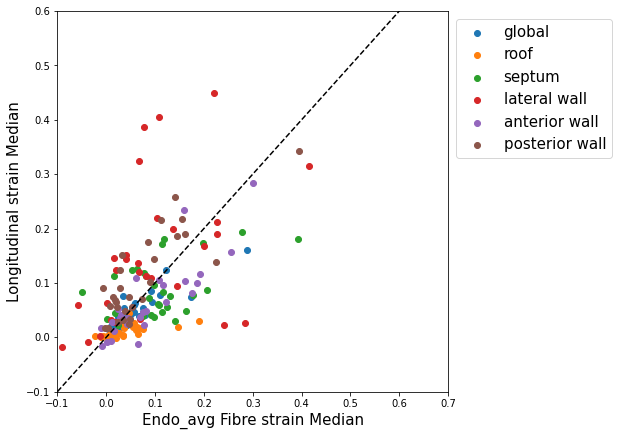

In [193]:
## Plotting Median

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_med[:, -2], long_med[:], label="global")
ax1.scatter(fib_reg_med[:, 0, 0], long_reg_med[:, 0], label="roof")
ax1.scatter(fib_reg_med[:, 1, 0], long_reg_med[:, 1], label="septum")
ax1.scatter(fib_reg_med[:, 2, 0], long_reg_med[:, 2], label="lateral wall")
ax1.scatter(fib_reg_med[:, 3, 0], long_reg_med[:, 3], label="anterior wall")
ax1.scatter(fib_reg_med[:, 4, 0], long_reg_med[:, 4], label="posterior wall")


ax1.plot(np.arange(-0.1,1,0.1), np.arange(-0.1,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain Median", fontsize=15)
ax1.set_ylabel("Longitudinal strain Median", fontsize=15)
plt.ylim(-0.1, 0.6)
plt.xlim(-0.1, 0.7)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

In [194]:
## Calculate pearson r coeff between long and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_med[:, -2], long_med[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_med[:, -2], long_med[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_med[:, i, 0], 
                                 long_reg_med[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_med[:, i, 0], 
                                 long_reg_med[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.863	rmse:	0.035
Region: roof 	r:	0.656 	rmse:	0.047
Region: sept 	r:	0.478 	rmse:	0.078
Region: lat 	r:	0.435 	rmse:	0.136
Region: ant 	r:	0.853 	rmse:	0.046
Region: post 	r:	0.825 	rmse:	0.06
